1) In iterator,py, we need to take optimization metric = sum of info 
2) fix info max in data
3) fix input for proposal operations
4) Move _unused_push to state and update unused nodes over there.

In [ ]:
alist = [1,2,3,4]
alist.index(3) # 3 un indexi, returns 2
alist[2] # the number at index, returns 3

2

In [1]:
import sys
from pathlib import Path

# Add the project root (the parent of the current directory) to sys.path
root = Path.cwd().parents[0]
if str(root) not in sys.path:
    sys.path.insert(0, str(root))



from uav_routing.socp import Solver
from uav_routing.data import grid_3x3, tour_info_decreasing

#nodes, cycle, data = grid_3x3()
nodes, cycle, data = tour_info_decreasing()


In [2]:
import math 

distances = {}
for edge in cycle.edges:
    u,v = edge
    point1, point2 = nodes[u]["position"], nodes[v]["position"]
    distances[(u,v)] = math.dist(point1, point2)
distances

{(0, 1): 1.0, (1, 2): 1.0, (2, 3): 1.0, (3, 0): 3.0}

In [ ]:
# Initialize solver
tour = cycle
solver = Solver(
    nodes=nodes,
    tour_nodes=list(tour.nodes),
    distances=distances,
    tour_edges=list(tour.edges),
    metadata=data,
    threads=1,
    log_output=True
)
# Print initial solution
print("Initial objective:", solver.objective_value)
if solver.solution:
    for var in solver.model.iter_continuous_vars():
        print(var.name, solver.solution.get_value(var))

In [1]:
import sys
from pathlib import Path

# Add the project root (the parent of the current directory) to sys.path
root = Path.cwd().parents[0]
if str(root) not in sys.path:
    sys.path.insert(0, str(root))



from uav_routing.socp import Solver
from uav_routing.data import grid_3x3, tour_info_decreasing, tour_info_increasing, tour_optimum_speed

#nodes, cycle, data = grid_3x3()
#nodes, cycle, data = tour_info_increasing()

nodes, cycle, data = tour_optimum_speed()

## $$ = \mathbf{v_{opt} \approx 18.1170353}$$

In [7]:
import math 

distances = {}
for edge in cycle.edges:
    u,v = edge
    point1, point2 = nodes[u]["position"], nodes[v]["position"]
    distances[(u,v)] = math.dist(point1, point2)
distances

# Initialize solver
tour = cycle
solver = Solver(
    nodes=nodes,
    tour_nodes=list(tour.nodes),
    distances=distances,
    tour_edges=list(tour.edges),
    metadata=data,
    threads=1,
    log_output=True
)
# Print initial solution
print("Initial objective:", solver.objective_value)
if solver.solution:
    for var in solver.model.iter_continuous_vars():
        print(var.name, solver.solution.get_value(var))

Version identifier: 22.1.2.0 | 2024-12-09 | 8bd2200c8
CPXPARAM_Read_DataCheck                          1
CPXPARAM_Threads                                 1
Tried aggregator 1 time.
QCP Presolve eliminated 2 rows and 2 columns.
Aggregator did 10 substitutions.
Reduced QCP has 43 rows, 36 columns, and 82 nonzeros.
Reduced QCP has 12 quadratic constraints.
Presolve time = 0.00 sec. (0.03 ticks)
Parallel mode: none, using 1 thread for barrier
Number of nonzeros in lower triangle of A*A' = 152
Using Approximate Minimum Degree ordering
Total time for automatic ordering = 0.00 sec. (0.01 ticks)
Summary statistics for Cholesky factor:
  Rows in Factor            = 43
  Integer space required    = 46
  Total non-zeros in factor = 285
  Total FP ops to factor    = 2309
 Itn      Primal Obj        Dual Obj  Prim Inf Upper Inf  Dual Inf Inf Ratio
   0   4.0000000e+01   4.0000000e+01  2.18e+04  0.00e+00  4.40e+01  1.00e+00
   1   4.0000000e+01   3.2803913e+01  2.18e+04  0.00e+00  4.40e+01  1.22e-01

In [ ]:
from uav_routing.data import generate_random_graph, plot_interactive_graph, plot_graph_with_positions

nodes, tour, metadata, tour_edges, distances, edges = generate_random_graph(num_nodes=10, edge_prob=0.3, seed=0)
plot_graph_with_positions(a, edges)
plot_interactive_graph(nodes, edges)
import networkx as nx
nx.draw(cycle)

#pos = {node:(nodes[node].position,nodes[node].position)}
#nx.draw(T, pos=...) 

In [1]:
# Add the project root (the parent of the current directory) to sys.path
import sys
from pathlib import Path
root = Path.cwd().parents[0]
if str(root) not in sys.path:
    sys.path.insert(0, str(root))

import sys
from pathlib import Path
from functools import partial

from uav_routing.proposal import random_flip, add_random_node, remove_random_node, swap_two_nodes, replace_random_node
from uav_routing.state import State
from uav_routing.iterator import Iterator
from uav_routing.accept import always_accept
from uav_routing.optimization import Optimizer

state = State.initial_state()

iteration = Iterator(
    proposal=partial(random_flip),
    accept=always_accept,
    initial_state=state,
    total_steps=1000,
)

optimizer = Optimizer(
    proposal=partial(random_flip),
    initial_state=state,
    maximize=True
)

# Local Search Plots

In [2]:
from uav_routing.optimization import Optimizer
import matplotlib.pyplot as plt

total_steps = 1000

import numpy as np

#----- Simulated Annealing
max_scores_anneal = np.zeros(total_steps)
scores_anneal = np.zeros(total_steps)

for i, state in enumerate(
    optimizer.simulated_annealing(
        total_steps,
        optimizer.jumpcycle_beta_function(20, 80),
        beta_magnitude=1,
        with_progress_bar=True
    )
):
    max_scores_anneal[i] = optimizer.best_score
    scores_anneal[i] = optimizer.score(state)

  0%|          | 0/1000 [00:00<?, ?it/s]

new score: 4198.999278024872
old score: 4198.999278024872
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>]
chosen method <function replace_random_node at 0x14846a0c0>
tour nodes before operation [0, 3, 6]
tour edges before operation [(0, 3), (3, 6), (6, 0)]
tour nodes after [0, 3, 8]
tour edges after [(0, 3), (3, 8), (8, 0)]
flows Flows(nodes_out=frozenset({6}), nodes_in=frozenset({8}), edges_out=frozenset({(6, 0), (3, 6)}), edges_in=frozenset({(3, 8), (8, 0)}))
new score: 16096.157060713042
old score: 4198.999278024872
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>]
chosen method <function swap_two_nodes at 0x148469f80>
tour nodes before operation [0, 3, 8]
tour edges before operation [(0, 3), (3, 8), (8, 0)]
tou

  1%|          | 12/1000 [00:00<00:08, 112.33it/s]

new score: 30092.11910657624
old score: 30092.794246428282
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>, <function swap_two_opt at 0x14846a340>]
chosen method <function swap_two_nodes at 0x148469f80>
tour nodes before operation [0, 5, 6, 8]
tour edges before operation [(0, 6), (5, 8), (6, 5), (8, 0)]
tour nodes after [0, 6, 5, 8]
tour edges after [(0, 5), (6, 8), (5, 6), (8, 0)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset(), edges_out=frozenset({(5, 8), (6, 5), (0, 6)}), edges_in=frozenset({(6, 8), (5, 6), (0, 5)}))
new score: 30089.122857077815
old score: 30092.794246428282
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>, <function swap_two_opt at 0x14846a340>]
chosen method <function remove_random_no

  2%|▏         | 24/1000 [00:00<00:08, 114.08it/s]

new score: 13997.763931879044
old score: 30092.794246428282
methods [<function remove_random_node at 0x14846a160>, <function add_random_node at 0x14846a200>, <function replace_random_node at 0x14846a0c0>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0, 5]
tour edges before operation [(0, 5), (5, 0)]
tour nodes after [0, 5, 7]
tour edges after [(0, 5), (5, 7), (7, 0)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({7}), edges_out=frozenset({(5, 0)}), edges_in=frozenset({(7, 0), (5, 7)}))
⚠️ No feasible solution found.
new score: 13997.763931879044
old score: 30092.794246428282
methods [<function remove_random_node at 0x14846a160>, <function add_random_node at 0x14846a200>, <function replace_random_node at 0x14846a0c0>]
chosen method <function replace_random_node at 0x14846a0c0>
tour nodes before operation [0, 5]
tour edges before operation [(0, 5), (5, 0)]
tour nodes after [0, 4]
tour edges after [(0, 4), (4, 0)]
flows Flows(nodes_out=froze

  4%|▎         | 36/1000 [00:00<00:08, 114.62it/s]

new score: 2099.5999999461537
old score: 30092.794246428282
methods [<function remove_random_node at 0x14846a160>, <function add_random_node at 0x14846a200>, <function replace_random_node at 0x14846a0c0>]
chosen method <function remove_random_node at 0x14846a160>
tour nodes before operation [0, 6]
tour edges before operation [(0, 6), (6, 0)]
random edge and the remove func (6, 0)
n1 6
removed 6
tour nodes after [0]
tour edges after []
flows Flows(nodes_out=frozenset({6}), nodes_in=frozenset(), edges_out=frozenset({(6, 0)}), edges_in=frozenset())
new score: 0.0
old score: 30092.794246428282
methods [<function add_random_node at 0x14846a200>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0]
tour edges before operation []
tour nodes after [0, 8]
tour edges after [(0, 8), (8, 0)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({8}), edges_out=frozenset(), edges_in=frozenset({(0, 8), (8, 0)}))
new score: 13997.171572786598
old score: 30092.794246

  5%|▍         | 48/1000 [00:00<00:08, 115.86it/s]

new score: 13997.763931879044
old score: 30092.794246428282
methods [<function remove_random_node at 0x14846a160>, <function add_random_node at 0x14846a200>, <function replace_random_node at 0x14846a0c0>]
chosen method <function remove_random_node at 0x14846a160>
tour nodes before operation [0, 5]
tour edges before operation [(0, 5), (5, 0)]
random edge and the remove func (5, 0)
n1 5
removed 5
tour nodes after [0]
tour edges after []
flows Flows(nodes_out=frozenset({5}), nodes_in=frozenset(), edges_out=frozenset({(5, 0)}), edges_in=frozenset())
new score: 0.0
old score: 30092.794246428282
methods [<function add_random_node at 0x14846a200>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0]
tour edges before operation []
tour nodes after [0, 5]
tour edges after [(0, 5), (5, 0)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({5}), edges_out=frozenset(), edges_in=frozenset({(5, 0), (0, 5)}))
new score: 13997.763931879044
old score: 30092.794246

  6%|▌         | 60/1000 [00:00<00:08, 114.25it/s]

⚠️ No feasible solution found.
new score: 0.0
old score: 30092.794246428282
methods [<function add_random_node at 0x14846a200>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0]
tour edges before operation []
tour nodes after [0, 1]
tour edges after [(0, 1), (1, 0)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({1}), edges_out=frozenset(), edges_in=frozenset({(0, 1), (1, 0)}))
⚠️ No feasible solution found.
new score: 0.0
old score: 30092.794246428282
methods [<function add_random_node at 0x14846a200>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0]
tour edges before operation []
tour nodes after [0, 1]
tour edges after [(0, 1), (1, 0)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({1}), edges_out=frozenset(), edges_in=frozenset({(0, 1), (1, 0)}))
⚠️ No feasible solution found.
new score: 0.0
old score: 30092.794246428282
methods [<function add_random_node at 0x14846a200>]
chosen method <funct

  7%|▋         | 72/1000 [00:00<00:08, 115.86it/s]

new score: 13997.999999820426
old score: 30092.794246428282
methods [<function remove_random_node at 0x14846a160>, <function add_random_node at 0x14846a200>, <function replace_random_node at 0x14846a0c0>]
chosen method <function remove_random_node at 0x14846a160>
tour nodes before operation [0, 2]
tour edges before operation [(0, 2), (2, 0)]
random edge and the remove func (2, 0)
n1 2
removed 2
tour nodes after [0]
tour edges after []
flows Flows(nodes_out=frozenset({2}), nodes_in=frozenset(), edges_out=frozenset({(2, 0)}), edges_in=frozenset())
new score: 0.0
old score: 30092.794246428282
methods [<function add_random_node at 0x14846a200>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0]
tour edges before operation []
tour nodes after [0, 5]
tour edges after [(0, 5), (5, 0)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({5}), edges_out=frozenset(), edges_in=frozenset({(5, 0), (0, 5)}))
new score: 13997.763931879044
old score: 30092.794246

  8%|▊         | 84/1000 [00:00<00:09, 91.70it/s] 

⚠️ No feasible solution found.
new score: 30091.285969935518
old score: 41990.99545632674
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>, <function swap_two_opt at 0x14846a340>]
chosen method <function swap_two_opt at 0x14846a340>
tour nodes before operation [0, 2, 8, 3]
tour edges before operation [(0, 8), (2, 3), (8, 2), (3, 0)]
tour nodes after [0, 2, 8, 3]
tour edges after [(0, 3), (2, 0), (8, 2), (3, 8)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset(), edges_out=frozenset({(2, 3), (0, 8), (3, 0)}), edges_in=frozenset({(3, 8), (0, 3), (2, 0)}))
new score: 30092.751123287737
old score: 41990.99545632674
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>, <function swap_two_opt at 0x14846a340>]
chosen metho

 10%|▉         | 96/1000 [00:00<00:09, 97.37it/s]

new score: 16096.563059106553
old score: 41990.99545632674
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0, 3, 2]
tour edges before operation [(0, 2), (3, 0), (2, 3)]
tour nodes after [0, 3, 2, 5]
tour edges after [(0, 5), (3, 0), (2, 3), (5, 2)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({5}), edges_out=frozenset({(0, 2)}), edges_in=frozenset({(0, 5), (5, 2)}))
new score: 30092.32481515565
old score: 41990.99545632674
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>, <function swap_two_opt at 0x14846a340>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0, 3, 2, 5]
tour edges befor

 11%|█         | 107/1000 [00:01<00:09, 91.95it/s]

⚠️ No feasible solution found.
new score: 46178.321959263645
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>, <function swap_two_opt at 0x14846a340>]
chosen method <function remove_random_node at 0x14846a160>
tour nodes before operation [0, 8, 5, 2, 3, 6]
tour edges before operation [(0, 8), (8, 2), (5, 0), (2, 3), (3, 6), (6, 5)]
random edge and the remove func (0, 8)
n2 8
removed 8
tour nodes after [0, 5, 2, 3, 6]
tour edges after [(0, 2), (5, 0), (2, 3), (3, 6), (6, 5)]
flows Flows(nodes_out=frozenset({8}), nodes_in=frozenset(), edges_out=frozenset({(0, 8)}), edges_in=frozenset({(0, 2)}))
new score: 32188.066275714642
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x

 12%|█▏        | 117/1000 [00:01<00:09, 91.65it/s]

new score: 18195.162582738245
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>, <function swap_two_opt at 0x14846a340>]
chosen method <function swap_two_opt at 0x14846a340>
tour nodes before operation [0, 5, 3, 6]
tour edges before operation [(0, 5), (5, 6), (3, 0), (6, 3)]
tour nodes after [0, 5, 3, 6]
tour edges after [(0, 3), (5, 6), (3, 5), (6, 0)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset(), edges_out=frozenset({(6, 3), (0, 5), (3, 0)}), edges_in=frozenset({(0, 3), (3, 5), (6, 0)}))
new score: 18194.104638606732
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>, <function swap_two_opt at 0x14846a340>]
chosen method <function replace_random_node

 13%|█▎        | 128/1000 [00:01<00:09, 95.89it/s]

new score: 30092.325255509888
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>, <function swap_two_opt at 0x14846a340>]
chosen method <function swap_two_opt at 0x14846a340>
tour nodes before operation [0, 8, 3, 5]
tour edges before operation [(0, 5), (8, 3), (3, 0), (5, 8)]
tour nodes after [0, 8, 3, 5]
tour edges after [(0, 3), (8, 0), (3, 5), (5, 8)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset(), edges_out=frozenset({(8, 3), (0, 5), (3, 0)}), edges_in=frozenset({(0, 3), (3, 5), (8, 0)}))
new score: 30092.174954443766
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>, <function swap_two_opt at 0x14846a340>]
chosen method <function replace_random_node

 14%|█▍        | 140/1000 [00:01<00:08, 100.37it/s]

new score: 30090.380160909786
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>, <function swap_two_opt at 0x14846a340>]
chosen method <function swap_two_nodes at 0x148469f80>
tour nodes before operation [0, 5, 8, 6]
tour edges before operation [(0, 8), (5, 0), (8, 6), (6, 5)]
tour nodes after [0, 5, 6, 8]
tour edges after [(0, 6), (5, 0), (6, 8), (8, 5)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset(), edges_out=frozenset({(0, 8), (6, 5), (8, 6)}), edges_in=frozenset({(6, 8), (8, 5), (0, 6)}))
new score: 30093.474713942047
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>, <function swap_two_opt at 0x14846a340>]
chosen method <function swap_two_opt at 0

 15%|█▌        | 151/1000 [00:01<00:09, 87.60it/s] 

new score: 44085.2395984444
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>, <function swap_two_opt at 0x14846a340>]
chosen method <function remove_random_node at 0x14846a160>
tour nodes before operation [0, 5, 2, 8, 6]
tour edges before operation [(0, 8), (5, 0), (2, 5), (8, 6), (6, 2)]
random edge and the remove func (2, 5)
n2 5
removed 5
tour nodes after [0, 2, 8, 6]
tour edges after [(0, 8), (2, 0), (8, 6), (6, 2)]
flows Flows(nodes_out=frozenset({5}), nodes_in=frozenset(), edges_out=frozenset({(2, 5)}), edges_in=frozenset({(2, 0)}))
new score: 30090.201913406276
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>, <function swap_two_opt at 0x14846a340>]
cho

 16%|█▌        | 162/1000 [00:01<00:09, 92.72it/s]

new score: 32188.051805550684
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>, <function swap_two_opt at 0x14846a340>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0, 5, 6, 8, 3]
tour edges before operation [(0, 8), (5, 0), (6, 5), (8, 3), (3, 6)]
tour nodes after [0, 5, 6, 8, 3, 7]
tour edges after [(0, 8), (5, 0), (6, 5), (8, 3), (3, 7), (7, 6)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({7}), edges_out=frozenset({(3, 6)}), edges_in=frozenset({(3, 7), (7, 6)}))
⚠️ No feasible solution found.
new score: 32188.051805550684
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>, <function swap_two_opt at 0x14846a340

 17%|█▋        | 172/1000 [00:01<00:09, 86.01it/s]

new score: 4199.399762844558
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0, 3, 6]
tour edges before operation [(0, 6), (3, 0), (6, 3)]
tour nodes after [0, 3, 6, 2]
tour edges after [(0, 6), (3, 0), (6, 2), (2, 3)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({2}), edges_out=frozenset({(6, 3)}), edges_in=frozenset({(2, 3), (6, 2)}))
new score: 18195.349627359217
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>, <function swap_two_opt at 0x14846a340>]
chosen method <function replace_random_node at 0x14846a0c0>
tour nodes before operation [0, 3, 6, 2]
tour edges b

 18%|█▊        | 184/1000 [00:01<00:08, 94.44it/s]

new score: 13997.999999820426
old score: 46181.40519321554
methods [<function remove_random_node at 0x14846a160>, <function add_random_node at 0x14846a200>, <function replace_random_node at 0x14846a0c0>]
chosen method <function replace_random_node at 0x14846a0c0>
tour nodes before operation [0, 2]
tour edges before operation [(0, 2), (2, 0)]
tour nodes after [0, 5]
tour edges after [(0, 5), (5, 0)]
flows Flows(nodes_out=frozenset({2}), nodes_in=frozenset({5}), edges_out=frozenset({(0, 2), (2, 0)}), edges_in=frozenset({(5, 0), (0, 5)}))
new score: 13997.763931879044
old score: 46181.40519321554
methods [<function remove_random_node at 0x14846a160>, <function add_random_node at 0x14846a200>, <function replace_random_node at 0x14846a0c0>]
chosen method <function replace_random_node at 0x14846a0c0>
tour nodes before operation [0, 5]
tour edges before operation [(0, 5), (5, 0)]
tour nodes after [0, 8]
tour edges after [(0, 8), (8, 0)]
flows Flows(nodes_out=frozenset({5}), nodes_in=frozenset

 20%|█▉        | 196/1000 [00:01<00:08, 99.75it/s]

new score: 16097.034118791831
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>]
chosen method <function remove_random_node at 0x14846a160>
tour nodes before operation [0, 2, 6]
tour edges before operation [(0, 6), (2, 0), (6, 2)]
random edge and the remove func (2, 0)
n1 2
removed 2
tour nodes after [0, 6]
tour edges after [(0, 6), (6, 0)]
flows Flows(nodes_out=frozenset({2}), nodes_in=frozenset(), edges_out=frozenset({(2, 0)}), edges_in=frozenset({(6, 0)}))
new score: 2099.5999999461537
old score: 46181.40519321554
methods [<function remove_random_node at 0x14846a160>, <function add_random_node at 0x14846a200>, <function replace_random_node at 0x14846a0c0>]
chosen method <function replace_random_node at 0x14846a0c0>
tour nodes before operation [0, 6]
tour edges before operation [(0, 6), (6, 0)]
tour nodes after [0, 1]
tou

 21%|██        | 207/1000 [00:02<00:10, 77.07it/s]

new score: 13997.171572786598
old score: 46181.40519321554
methods [<function remove_random_node at 0x14846a160>, <function add_random_node at 0x14846a200>, <function replace_random_node at 0x14846a0c0>]
chosen method <function remove_random_node at 0x14846a160>
tour nodes before operation [0, 8]
tour edges before operation [(0, 8), (8, 0)]
random edge and the remove func (0, 8)
n2 8
removed 8
tour nodes after [0]
tour edges after []
flows Flows(nodes_out=frozenset({8}), nodes_in=frozenset(), edges_out=frozenset({(0, 8)}), edges_in=frozenset())
new score: 0.0
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0]
tour edges before operation []
tour nodes after [0, 8]
tour edges after [(0, 8), (8, 0)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({8}), edges_out=frozenset(), edges_in=frozenset({(0, 8), (8, 0)}))
new score: 13997.171572786598
old score: 46181.40519321

 22%|██▏       | 219/1000 [00:02<00:09, 79.43it/s]

new score: 41990.99850645814
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>, <function swap_two_opt at 0x14846a340>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0, 8, 5, 2]
tour edges before operation [(0, 8), (8, 5), (5, 2), (2, 0)]
tour nodes after [0, 8, 5, 2, 4]
tour edges after [(0, 8), (8, 5), (5, 4), (2, 0), (4, 2)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({4}), edges_out=frozenset({(5, 2)}), edges_in=frozenset({(5, 4), (4, 2)}))
⚠️ No feasible solution found.
new score: 41990.99850645814
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>, <function swap_two_opt at 0x14846a340>]
chosen method <functi

 23%|██▎       | 231/1000 [00:02<00:08, 87.76it/s]

⚠️ No feasible solution found.
new score: 13997.763931879044
old score: 46181.40519321554
methods [<function remove_random_node at 0x14846a160>, <function add_random_node at 0x14846a200>, <function replace_random_node at 0x14846a0c0>]
chosen method <function remove_random_node at 0x14846a160>
tour nodes before operation [0, 5]
tour edges before operation [(0, 5), (5, 0)]
random edge and the remove func (0, 5)
n2 5
removed 5
tour nodes after [0]
tour edges after []
flows Flows(nodes_out=frozenset({5}), nodes_in=frozenset(), edges_out=frozenset({(0, 5)}), edges_in=frozenset())
new score: 0.0
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0]
tour edges before operation []
tour nodes after [0, 7]
tour edges after [(0, 7), (7, 0)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({7}), edges_out=frozenset(), edges_in=frozenset({(0, 7), (7, 0)}))
⚠️ No feasible solution 

 24%|██▍       | 243/1000 [00:02<00:08, 93.79it/s]

new score: 27994.527648795345
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>]
chosen method <function replace_random_node at 0x14846a0c0>
tour nodes before operation [0, 5, 2]
tour edges before operation [(0, 2), (5, 0), (2, 5)]
tour nodes after [0, 6, 2]
tour edges after [(0, 2), (6, 0), (2, 6)]
flows Flows(nodes_out=frozenset({5}), nodes_in=frozenset({6}), edges_out=frozenset({(2, 5), (5, 0)}), edges_in=frozenset({(2, 6), (6, 0)}))
new score: 16094.767866020371
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0, 6, 2]
tour edges before operation [(0, 2), (6, 0), (2, 6)]
t

 25%|██▌       | 253/1000 [00:02<00:09, 82.06it/s]

⚠️ No feasible solution found.
new score: 27994.999561777287
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0, 2, 5]
tour edges before operation [(0, 5), (2, 0), (5, 2)]
tour nodes after [0, 2, 5, 1]
tour edges after [(0, 5), (2, 1), (5, 2), (1, 0)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({1}), edges_out=frozenset({(2, 0)}), edges_in=frozenset({(1, 0), (2, 1)}))
⚠️ No feasible solution found.
new score: 27994.999561777287
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0, 2,

 26%|██▋       | 264/1000 [00:02<00:08, 87.55it/s]

new score: 30088.941572263207
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>, <function swap_two_opt at 0x14846a340>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0, 2, 5, 6]
tour edges before operation [(0, 5), (2, 6), (5, 2), (6, 0)]
tour nodes after [0, 2, 5, 6, 8]
tour edges after [(0, 8), (2, 6), (5, 2), (6, 0), (8, 5)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({8}), edges_out=frozenset({(0, 5)}), edges_in=frozenset({(0, 8), (8, 5)}))
new score: 44082.11071745392
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>, <function swap_two_opt at 0x14846a340>]
chosen method <function replace_random_node at 0x14

 28%|██▊       | 275/1000 [00:02<00:07, 92.89it/s]

new score: 16097.017879866638
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>]
chosen method <function swap_two_nodes at 0x148469f80>
tour nodes before operation [0, 6, 2]
tour edges before operation [(0, 6), (6, 2), (2, 0)]
tour nodes after [0, 2, 6]
tour edges after [(0, 2), (2, 6), (6, 0)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset(), edges_out=frozenset({(6, 2), (2, 0), (0, 6)}), edges_in=frozenset({(0, 2), (2, 6), (6, 0)}))
new score: 16094.752263676759
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>]
chosen method <function remove_random_node at 0x14846a160>
tour nodes before operation [0, 2, 6]
tour edges before operation [(0, 2), (2, 6), (

 29%|██▊       | 287/1000 [00:03<00:07, 99.07it/s]

⚠️ No feasible solution found.
new score: 16096.196056568731
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>]
chosen method <function swap_two_nodes at 0x148469f80>
tour nodes before operation [0, 6, 8]
tour edges before operation [(0, 6), (6, 8), (8, 0)]
tour nodes after [0, 8, 6]
tour edges after [(0, 8), (8, 6), (6, 0)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset(), edges_out=frozenset({(6, 8), (8, 0), (0, 6)}), edges_in=frozenset({(0, 8), (8, 6), (6, 0)}))
new score: 16095.591733306352
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>]
chosen method <function remove_random_node at 0x14846a160>
tour nodes before operation [0, 8, 6]
tour edges befo

 30%|██▉       | 299/1000 [00:03<00:06, 102.70it/s]

⚠️ No feasible solution found.
new score: 4199.399162215536
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>]
chosen method <function swap_two_nodes at 0x148469f80>
tour nodes before operation [0, 6, 3]
tour edges before operation [(0, 6), (6, 3), (3, 0)]
tour nodes after [0, 3, 6]
tour edges after [(0, 3), (3, 6), (6, 0)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset(), edges_out=frozenset({(6, 3), (3, 0), (0, 6)}), edges_in=frozenset({(0, 3), (6, 0), (3, 6)}))
new score: 4198.999278024872
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>]
chosen method <function remove_random_node at 0x14846a160>
tour nodes before operation [0, 3, 6]
tour edges before

 31%|███       | 311/1000 [00:03<00:06, 105.15it/s]

⚠️ No feasible solution found.
new score: 16096.158377245063
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>]
chosen method <function swap_two_nodes at 0x148469f80>
tour nodes before operation [0, 8, 3]
tour edges before operation [(0, 3), (8, 0), (3, 8)]
tour nodes after [0, 3, 8]
tour edges after [(0, 8), (3, 0), (8, 3)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset(), edges_out=frozenset({(3, 8), (0, 3), (8, 0)}), edges_in=frozenset({(8, 3), (0, 8), (3, 0)}))
new score: 16096.560963867903
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0, 3, 8]
tour edges before 

 32%|███▏      | 322/1000 [00:03<00:06, 105.84it/s]

new score: 30091.26203740734
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>, <function swap_two_opt at 0x14846a340>]
chosen method <function swap_two_opt at 0x14846a340>
tour nodes before operation [0, 8, 2, 3]
tour edges before operation [(0, 2), (8, 3), (2, 8), (3, 0)]
tour nodes after [0, 8, 2, 3]
tour edges after [(0, 2), (8, 0), (2, 3), (3, 8)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset(), edges_out=frozenset({(8, 3), (3, 0), (2, 8)}), edges_in=frozenset({(2, 3), (3, 8), (8, 0)}))
new score: 30088.85755197637
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>, <function swap_two_opt at 0x14846a340>]
chosen method <function remove_random_node at

 33%|███▎      | 333/1000 [00:03<00:06, 95.29it/s] 

new score: 27993.998151342166
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>]
chosen method <function swap_two_nodes at 0x148469f80>
tour nodes before operation [0, 2, 8]
tour edges before operation [(0, 8), (2, 0), (8, 2)]
tour nodes after [0, 8, 2]
tour edges after [(0, 2), (8, 0), (2, 8)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset(), edges_out=frozenset({(8, 2), (0, 8), (2, 0)}), edges_in=frozenset({(0, 2), (8, 0), (2, 8)}))
new score: 27992.340756452526
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>]
chosen method <function remove_random_node at 0x14846a160>
tour nodes before operation [0, 8, 2]
tour edges before operation [(0, 2), (8, 0), (

 34%|███▍      | 344/1000 [00:03<00:06, 98.43it/s]

new score: 0.0
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0]
tour edges before operation []
tour nodes after [0, 4]
tour edges after [(0, 4), (4, 0)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({4}), edges_out=frozenset(), edges_in=frozenset({(4, 0), (0, 4)}))
⚠️ No feasible solution found.
new score: 0.0
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0]
tour edges before operation []
tour nodes after [0, 3]
tour edges after [(0, 3), (3, 0)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({3}), edges_out=frozenset(), edges_in=frozenset({(0, 3), (3, 0)}))
new score: 2099.799999969256
old score: 46181.40519321554
methods [<function remove_random_node at 0x14846a160>, <function add_random_node at 0x14846a200>, <function replace_random_

 36%|███▌      | 356/1000 [00:03<00:06, 102.82it/s]

new score: 16096.157060713042
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>]
chosen method <function replace_random_node at 0x14846a0c0>
tour nodes before operation [0, 3, 8]
tour edges before operation [(0, 3), (3, 8), (8, 0)]
tour nodes after [0, 3, 5]
tour edges after [(0, 3), (3, 5), (5, 0)]
flows Flows(nodes_out=frozenset({8}), nodes_in=frozenset({5}), edges_out=frozenset({(3, 8), (8, 0)}), edges_in=frozenset({(5, 0), (3, 5)}))
new score: 16096.909078984332
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0, 3, 5]
tour edges before operation [(0, 3), (3, 5), (5, 0)]
t

 37%|███▋      | 367/1000 [00:03<00:06, 104.35it/s]

new score: 18195.861479027863
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>, <function swap_two_opt at 0x14846a340>]
chosen method <function replace_random_node at 0x14846a0c0>
tour nodes before operation [0, 3, 6, 5]
tour edges before operation [(0, 6), (3, 5), (6, 3), (5, 0)]
tour nodes after [0, 3, 4, 5]
tour edges after [(0, 4), (3, 5), (4, 3), (5, 0)]
flows Flows(nodes_out=frozenset({6}), nodes_in=frozenset({4}), edges_out=frozenset({(6, 3), (0, 6)}), edges_in=frozenset({(0, 4), (4, 3)}))
⚠️ No feasible solution found.
new score: 18195.861479027863
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>, <function swap_two_opt at 0x14846a340>]
chosen method <

 38%|███▊      | 379/1000 [00:03<00:05, 107.94it/s]

new score: 0.0
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0]
tour edges before operation []
tour nodes after [0, 8]
tour edges after [(0, 8), (8, 0)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({8}), edges_out=frozenset(), edges_in=frozenset({(0, 8), (8, 0)}))
new score: 13997.171572786598
old score: 46181.40519321554
methods [<function remove_random_node at 0x14846a160>, <function add_random_node at 0x14846a200>, <function replace_random_node at 0x14846a0c0>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0, 8]
tour edges before operation [(0, 8), (8, 0)]
tour nodes after [0, 8, 7]
tour edges after [(0, 8), (8, 7), (7, 0)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({7}), edges_out=frozenset({(8, 0)}), edges_in=frozenset({(8, 7), (7, 0)}))
⚠️ No feasible solution found.
new score: 13997.171572786598
old sco

 39%|███▉      | 390/1000 [00:04<00:06, 98.10it/s] 

new score: 2099.799999969256
old score: 46181.40519321554
methods [<function remove_random_node at 0x14846a160>, <function add_random_node at 0x14846a200>, <function replace_random_node at 0x14846a0c0>]
chosen method <function remove_random_node at 0x14846a160>
tour nodes before operation [0, 3]
tour edges before operation [(0, 3), (3, 0)]
random edge and the remove func (3, 0)
n1 3
removed 3
tour nodes after [0]
tour edges after []
flows Flows(nodes_out=frozenset({3}), nodes_in=frozenset(), edges_out=frozenset({(3, 0)}), edges_in=frozenset())
new score: 0.0
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0]
tour edges before operation []
tour nodes after [0, 1]
tour edges after [(0, 1), (1, 0)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({1}), edges_out=frozenset(), edges_in=frozenset({(0, 1), (1, 0)}))
⚠️ No feasible solution found.
new score: 0.0
old score:

 40%|████      | 402/1000 [00:04<00:05, 103.67it/s]

new score: 2099.799999969256
old score: 46181.40519321554
methods [<function remove_random_node at 0x14846a160>, <function add_random_node at 0x14846a200>, <function replace_random_node at 0x14846a0c0>]
chosen method <function replace_random_node at 0x14846a0c0>
tour nodes before operation [0, 3]
tour edges before operation [(0, 3), (3, 0)]
tour nodes after [0, 5]
tour edges after [(0, 5), (5, 0)]
flows Flows(nodes_out=frozenset({3}), nodes_in=frozenset({5}), edges_out=frozenset({(0, 3), (3, 0)}), edges_in=frozenset({(5, 0), (0, 5)}))
new score: 13997.763931879044
old score: 46181.40519321554
methods [<function remove_random_node at 0x14846a160>, <function add_random_node at 0x14846a200>, <function replace_random_node at 0x14846a0c0>]
chosen method <function remove_random_node at 0x14846a160>
tour nodes before operation [0, 5]
tour edges before operation [(0, 5), (5, 0)]
random edge and the remove func (0, 5)
n2 5
removed 5
tour nodes after [0]
tour edges after []
flows Flows(nodes_out

 41%|████▏     | 413/1000 [00:04<00:06, 94.33it/s] 

⚠️ No feasible solution found.
new score: 0.0
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0]
tour edges before operation []
tour nodes after [0, 7]
tour edges after [(0, 7), (7, 0)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({7}), edges_out=frozenset(), edges_in=frozenset({(0, 7), (7, 0)}))
⚠️ No feasible solution found.
new score: 0.0
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0]
tour edges before operation []
tour nodes after [0, 6]
tour edges after [(0, 6), (6, 0)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({6}), edges_out=frozenset(), edges_in=frozenset({(6, 0), (0, 6)}))
new score: 2099.5999999461537
old score: 46181.40519321554
methods [<function remove_random_node at 0x14846a160>, <function add_random_node at 0x14846

 42%|████▏     | 423/1000 [00:04<00:06, 95.57it/s]

new score: 13997.763931879044
old score: 46181.40519321554
methods [<function remove_random_node at 0x14846a160>, <function add_random_node at 0x14846a200>, <function replace_random_node at 0x14846a0c0>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0, 5]
tour edges before operation [(0, 5), (5, 0)]
tour nodes after [0, 5, 8]
tour edges after [(0, 8), (5, 0), (8, 5)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({8}), edges_out=frozenset({(0, 5)}), edges_in=frozenset({(0, 8), (8, 5)}))
new score: 27994.52609987493
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>]
chosen method <function replace_random_node at 0x14846a0c0>
tour nodes before operation [0, 5, 8]
tour edges before operation [(0, 8), (5, 0), (8, 5)]
tour nodes after [0, 5, 4]
tour edges after [(0, 4), (5, 0), (4, 5

 43%|████▎     | 434/1000 [00:04<00:05, 98.37it/s]

new score: 18196.104643949395
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>, <function swap_two_opt at 0x14846a340>]
chosen method <function remove_random_node at 0x14846a160>
tour nodes before operation [0, 2, 6, 3]
tour edges before operation [(0, 6), (2, 0), (6, 3), (3, 2)]
random edge and the remove func (3, 2)
n2 2
removed 2
tour nodes after [0, 6, 3]
tour edges after [(0, 6), (6, 3), (3, 0)]
flows Flows(nodes_out=frozenset({2}), nodes_in=frozenset(), edges_out=frozenset({(3, 2)}), edges_in=frozenset({(3, 0)}))
new score: 4199.399162215536
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>]
chosen method <function replace_random_node at 0x14846a0c0>
tour

 45%|████▍     | 446/1000 [00:04<00:05, 102.52it/s]

new score: 2099.5999999461537
old score: 46181.40519321554
methods [<function remove_random_node at 0x14846a160>, <function add_random_node at 0x14846a200>, <function replace_random_node at 0x14846a0c0>]
chosen method <function replace_random_node at 0x14846a0c0>
tour nodes before operation [0, 6]
tour edges before operation [(0, 6), (6, 0)]
tour nodes after [0, 8]
tour edges after [(0, 8), (8, 0)]
flows Flows(nodes_out=frozenset({6}), nodes_in=frozenset({8}), edges_out=frozenset({(6, 0), (0, 6)}), edges_in=frozenset({(0, 8), (8, 0)}))
new score: 13997.171572786598
old score: 46181.40519321554
methods [<function remove_random_node at 0x14846a160>, <function add_random_node at 0x14846a200>, <function replace_random_node at 0x14846a0c0>]
chosen method <function replace_random_node at 0x14846a0c0>
tour nodes before operation [0, 8]
tour edges before operation [(0, 8), (8, 0)]
tour nodes after [0, 3]
tour edges after [(0, 3), (3, 0)]
flows Flows(nodes_out=frozenset({8}), nodes_in=frozenset

 46%|████▌     | 458/1000 [00:04<00:05, 105.69it/s]

new score: 0.0
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0]
tour edges before operation []
tour nodes after [0, 8]
tour edges after [(0, 8), (8, 0)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({8}), edges_out=frozenset(), edges_in=frozenset({(0, 8), (8, 0)}))
new score: 13997.171572786598
old score: 46181.40519321554
methods [<function remove_random_node at 0x14846a160>, <function add_random_node at 0x14846a200>, <function replace_random_node at 0x14846a0c0>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0, 8]
tour edges before operation [(0, 8), (8, 0)]
tour nodes after [0, 8, 2]
tour edges after [(0, 2), (8, 0), (2, 8)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({2}), edges_out=frozenset({(0, 8)}), edges_in=frozenset({(0, 2), (2, 8)}))
new score: 27992.340756452526
old score: 46181.40519321554
methods [

 47%|████▋     | 470/1000 [00:04<00:04, 107.63it/s]

new score: 13997.171572786598
old score: 46181.40519321554
methods [<function remove_random_node at 0x14846a160>, <function add_random_node at 0x14846a200>, <function replace_random_node at 0x14846a0c0>]
chosen method <function replace_random_node at 0x14846a0c0>
tour nodes before operation [0, 8]
tour edges before operation [(0, 8), (8, 0)]
tour nodes after [0, 5]
tour edges after [(0, 5), (5, 0)]
flows Flows(nodes_out=frozenset({8}), nodes_in=frozenset({5}), edges_out=frozenset({(0, 8), (8, 0)}), edges_in=frozenset({(5, 0), (0, 5)}))
new score: 13997.763931879044
old score: 46181.40519321554
methods [<function remove_random_node at 0x14846a160>, <function add_random_node at 0x14846a200>, <function replace_random_node at 0x14846a0c0>]
chosen method <function replace_random_node at 0x14846a0c0>
tour nodes before operation [0, 5]
tour edges before operation [(0, 5), (5, 0)]
tour nodes after [0, 3]
tour edges after [(0, 3), (3, 0)]
flows Flows(nodes_out=frozenset({5}), nodes_in=frozenset

 48%|████▊     | 482/1000 [00:04<00:04, 108.54it/s]

new score: 2099.799999969256
old score: 46181.40519321554
methods [<function remove_random_node at 0x14846a160>, <function add_random_node at 0x14846a200>, <function replace_random_node at 0x14846a0c0>]
chosen method <function remove_random_node at 0x14846a160>
tour nodes before operation [0, 3]
tour edges before operation [(0, 3), (3, 0)]
random edge and the remove func (0, 3)
n2 3
removed 3
tour nodes after [0]
tour edges after []
flows Flows(nodes_out=frozenset({3}), nodes_in=frozenset(), edges_out=frozenset({(0, 3)}), edges_in=frozenset())
new score: 0.0
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0]
tour edges before operation []
tour nodes after [0, 3]
tour edges after [(0, 3), (3, 0)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({3}), edges_out=frozenset(), edges_in=frozenset({(0, 3), (3, 0)}))
new score: 2099.799999969256
old score: 46181.4051932155

 49%|████▉     | 493/1000 [00:05<00:05, 97.13it/s] 

new score: 13997.763931879044
old score: 46181.40519321554
methods [<function remove_random_node at 0x14846a160>, <function add_random_node at 0x14846a200>, <function replace_random_node at 0x14846a0c0>]
chosen method <function replace_random_node at 0x14846a0c0>
tour nodes before operation [0, 5]
tour edges before operation [(0, 5), (5, 0)]
tour nodes after [0, 3]
tour edges after [(0, 3), (3, 0)]
flows Flows(nodes_out=frozenset({5}), nodes_in=frozenset({3}), edges_out=frozenset({(5, 0), (0, 5)}), edges_in=frozenset({(0, 3), (3, 0)}))
new score: 2099.799999969256
old score: 46181.40519321554
methods [<function remove_random_node at 0x14846a160>, <function add_random_node at 0x14846a200>, <function replace_random_node at 0x14846a0c0>]
chosen method <function replace_random_node at 0x14846a0c0>
tour nodes before operation [0, 3]
tour edges before operation [(0, 3), (3, 0)]
tour nodes after [0, 1]
tour edges after [(0, 1), (1, 0)]
flows Flows(nodes_out=frozenset({3}), nodes_in=frozenset(

 50%|█████     | 505/1000 [00:05<00:04, 102.62it/s]

new score: 13997.999999820426
old score: 46181.40519321554
methods [<function remove_random_node at 0x14846a160>, <function add_random_node at 0x14846a200>, <function replace_random_node at 0x14846a0c0>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0, 2]
tour edges before operation [(0, 2), (2, 0)]
tour nodes after [0, 2, 5]
tour edges after [(0, 5), (2, 0), (5, 2)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({5}), edges_out=frozenset({(0, 2)}), edges_in=frozenset({(0, 5), (5, 2)}))
new score: 27994.999561777287
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>]
chosen method <function replace_random_node at 0x14846a0c0>
tour nodes before operation [0, 2, 5]
tour edges before operation [(0, 5), (2, 0), (5, 2)]
tour nodes after [0, 2, 3]
tour edges after [(0, 3), (2, 0), (3, 

 52%|█████▏    | 516/1000 [00:05<00:04, 103.80it/s]

new score: 18195.749132486424
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>, <function swap_two_opt at 0x14846a340>]
chosen method <function swap_two_opt at 0x14846a340>
tour nodes before operation [0, 3, 6, 5]
tour edges before operation [(0, 6), (3, 0), (6, 5), (5, 3)]
tour nodes after [0, 3, 6, 5]
tour edges after [(0, 5), (3, 0), (6, 3), (5, 6)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset(), edges_out=frozenset({(5, 3), (6, 5), (0, 6)}), edges_in=frozenset({(6, 3), (5, 6), (0, 5)}))
new score: 18195.15957052271
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>, <function swap_two_opt at 0x14846a340>]
chosen method <function remove_random_node a

 53%|█████▎    | 528/1000 [00:05<00:04, 106.00it/s]

new score: 18193.74130888738
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>, <function swap_two_opt at 0x14846a340>]
chosen method <function swap_two_nodes at 0x148469f80>
tour nodes before operation [0, 6, 3, 8]
tour edges before operation [(0, 8), (6, 0), (3, 6), (8, 3)]
tour nodes after [0, 3, 6, 8]
tour edges after [(0, 8), (3, 0), (6, 3), (8, 6)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset(), edges_out=frozenset({(8, 3), (3, 6), (6, 0)}), edges_in=frozenset({(6, 3), (8, 6), (3, 0)}))
new score: 18195.39635259494
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>, <function swap_two_opt at 0x14846a340>]
chosen method <function swap_two_nodes at 0

 54%|█████▍    | 539/1000 [00:05<00:04, 106.42it/s]

new score: 0.0
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0]
tour edges before operation []
tour nodes after [0, 2]
tour edges after [(0, 2), (2, 0)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({2}), edges_out=frozenset(), edges_in=frozenset({(0, 2), (2, 0)}))
new score: 13997.999999820426
old score: 46181.40519321554
methods [<function remove_random_node at 0x14846a160>, <function add_random_node at 0x14846a200>, <function replace_random_node at 0x14846a0c0>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0, 2]
tour edges before operation [(0, 2), (2, 0)]
tour nodes after [0, 2, 3]
tour edges after [(0, 2), (2, 3), (3, 0)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({3}), edges_out=frozenset({(2, 0)}), edges_in=frozenset({(2, 3), (3, 0)}))
new score: 16096.554697439355
old score: 46181.40519321554
methods [

 55%|█████▌    | 550/1000 [00:05<00:04, 106.90it/s]

⚠️ No feasible solution found.
new score: 32188.55599050894
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>, <function swap_two_opt at 0x14846a340>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0, 2, 3, 6, 5]
tour edges before operation [(0, 6), (2, 3), (3, 5), (6, 2), (5, 0)]
tour nodes after [0, 2, 3, 6, 5, 7]
tour edges after [(0, 7), (2, 3), (3, 5), (6, 2), (5, 0), (7, 6)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({7}), edges_out=frozenset({(0, 6)}), edges_in=frozenset({(0, 7), (7, 6)}))
⚠️ No feasible solution found.
new score: 32188.55599050894
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>, <functio

 56%|█████▌    | 561/1000 [00:05<00:04, 95.65it/s] 

new score: 18194.35169359634
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>, <function swap_two_opt at 0x14846a340>]
chosen method <function swap_two_opt at 0x14846a340>
tour nodes before operation [0, 3, 6, 8]
tour edges before operation [(0, 3), (3, 8), (6, 0), (8, 6)]
tour nodes after [0, 3, 6, 8]
tour edges after [(0, 8), (3, 6), (6, 0), (8, 3)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset(), edges_out=frozenset({(3, 8), (0, 3), (8, 6)}), edges_in=frozenset({(8, 3), (0, 8), (3, 6)}))
new score: 18193.761245045775
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>, <function swap_two_opt at 0x14846a340>]
chosen method <function add_random_node at 0

 57%|█████▋    | 571/1000 [00:05<00:05, 80.06it/s]

⚠️ No feasible solution found.
new score: 32185.877656331424
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>, <function swap_two_opt at 0x14846a340>]
chosen method <function swap_two_nodes at 0x148469f80>
tour nodes before operation [0, 3, 8, 6, 2]
tour edges before operation [(0, 2), (3, 8), (8, 6), (6, 0), (2, 3)]
tour nodes after [0, 8, 3, 6, 2]
tour edges after [(0, 2), (8, 3), (3, 6), (6, 0), (2, 8)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset(), edges_out=frozenset({(2, 3), (3, 8), (8, 6)}), edges_in=frozenset({(8, 3), (2, 8), (3, 6)}))
new score: 32186.49685521156
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>, <function swap_two_opt at 0x1

 58%|█████▊    | 580/1000 [00:06<00:05, 73.53it/s]

⚠️ No feasible solution found.
new score: 32188.863924254845
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>, <function swap_two_opt at 0x14846a340>]
chosen method <function swap_two_nodes at 0x148469f80>
tour nodes before operation [0, 3, 6, 2, 8]
tour edges before operation [(0, 8), (3, 2), (6, 3), (2, 0), (8, 6)]
tour nodes after [0, 3, 2, 6, 8]
tour edges after [(0, 8), (3, 6), (2, 3), (6, 0), (8, 2)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset(), edges_out=frozenset({(3, 2), (6, 3), (2, 0), (8, 6)}), edges_in=frozenset({(2, 3), (8, 2), (6, 0), (3, 6)}))
new score: 32186.518186701243
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>, <function sw

 59%|█████▉    | 588/1000 [00:06<00:05, 70.82it/s]

new score: 16094.752263676759
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0, 2, 6]
tour edges before operation [(0, 2), (2, 6), (6, 0)]
tour nodes after [0, 2, 6, 3]
tour edges after [(0, 2), (2, 6), (6, 3), (3, 0)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({3}), edges_out=frozenset({(6, 0)}), edges_in=frozenset({(6, 3), (3, 0)}))
new score: 18194.56003488342
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>, <function swap_two_opt at 0x14846a340>]
chosen method <function swap_two_opt at 0x14846a340>
tour nodes before operation [0, 2, 6, 3]
tour edges before o

 60%|█████▉    | 598/1000 [00:06<00:05, 76.07it/s]

new score: 2099.5999999461537
old score: 46181.40519321554
methods [<function remove_random_node at 0x14846a160>, <function add_random_node at 0x14846a200>, <function replace_random_node at 0x14846a0c0>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0, 6]
tour edges before operation [(0, 6), (6, 0)]
tour nodes after [0, 6, 5]
tour edges after [(0, 6), (6, 5), (5, 0)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({5}), edges_out=frozenset({(6, 0)}), edges_in=frozenset({(5, 0), (6, 5)}))
new score: 16096.867902195745
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>]
chosen method <function swap_two_nodes at 0x148469f80>
tour nodes before operation [0, 6, 5]
tour edges before operation [(0, 6), (6, 5), (5, 0)]
tour nodes after [0, 5, 6]
tour edges after [(0, 5), (5, 6), (6, 0)]
f

 61%|██████    | 608/1000 [00:06<00:04, 80.53it/s]

new score: 16095.357841026807
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>]
chosen method <function remove_random_node at 0x14846a160>
tour nodes before operation [0, 6, 5]
tour edges before operation [(0, 5), (6, 0), (5, 6)]
random edge and the remove func (0, 5)
n2 5
removed 5
tour nodes after [0, 6]
tour edges after [(0, 6), (6, 0)]
flows Flows(nodes_out=frozenset({5}), nodes_in=frozenset(), edges_out=frozenset({(0, 5)}), edges_in=frozenset({(0, 6)}))
new score: 2099.5999999461537
old score: 46181.40519321554
methods [<function remove_random_node at 0x14846a160>, <function add_random_node at 0x14846a200>, <function replace_random_node at 0x14846a0c0>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0, 6]
tour edges before operation [(0, 6), (6, 0)]
tour nodes after [0, 6, 1]
tour

 62%|██████▏   | 618/1000 [00:06<00:04, 83.59it/s]

new score: 13997.763931879044
old score: 46181.40519321554
methods [<function remove_random_node at 0x14846a160>, <function add_random_node at 0x14846a200>, <function replace_random_node at 0x14846a0c0>]
chosen method <function remove_random_node at 0x14846a160>
tour nodes before operation [0, 5]
tour edges before operation [(0, 5), (5, 0)]
random edge and the remove func (5, 0)
n1 5
removed 5
tour nodes after [0]
tour edges after []
flows Flows(nodes_out=frozenset({5}), nodes_in=frozenset(), edges_out=frozenset({(5, 0)}), edges_in=frozenset())
new score: 0.0
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0]
tour edges before operation []
tour nodes after [0, 2]
tour edges after [(0, 2), (2, 0)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({2}), edges_out=frozenset(), edges_in=frozenset({(0, 2), (2, 0)}))
new score: 13997.999999820426
old score: 46181.40519321

 63%|██████▎   | 628/1000 [00:06<00:04, 87.05it/s]

⚠️ No feasible solution found.
new score: 0.0
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0]
tour edges before operation []
tour nodes after [0, 3]
tour edges after [(0, 3), (3, 0)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({3}), edges_out=frozenset(), edges_in=frozenset({(0, 3), (3, 0)}))
new score: 2099.799999969256
old score: 46181.40519321554
methods [<function remove_random_node at 0x14846a160>, <function add_random_node at 0x14846a200>, <function replace_random_node at 0x14846a0c0>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0, 3]
tour edges before operation [(0, 3), (3, 0)]
tour nodes after [0, 3, 2]
tour edges after [(0, 3), (3, 2), (2, 0)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({2}), edges_out=frozenset({(3, 0)}), edges_in=frozenset({(3, 2), (2, 0)}))
new score: 16097.14964604736
old score

 64%|██████▎   | 637/1000 [00:06<00:04, 77.66it/s]

new score: 2099.799999969256
old score: 46181.40519321554
methods [<function remove_random_node at 0x14846a160>, <function add_random_node at 0x14846a200>, <function replace_random_node at 0x14846a0c0>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0, 3]
tour edges before operation [(0, 3), (3, 0)]
tour nodes after [0, 3, 6]
tour edges after [(0, 3), (3, 6), (6, 0)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({6}), edges_out=frozenset({(3, 0)}), edges_in=frozenset({(6, 0), (3, 6)}))
new score: 4198.999278024872
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>]
chosen method <function remove_random_node at 0x14846a160>
tour nodes before operation [0, 3, 6]
tour edges before operation [(0, 3), (3, 6), (6, 0)]
random edge and the remove func (6, 0)
n1 6
removed 6
tour nodes aft

 65%|██████▍   | 647/1000 [00:06<00:04, 82.45it/s]

new score: 13997.171572786598
old score: 46181.40519321554
methods [<function remove_random_node at 0x14846a160>, <function add_random_node at 0x14846a200>, <function replace_random_node at 0x14846a0c0>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0, 8]
tour edges before operation [(0, 8), (8, 0)]
tour nodes after [0, 8, 1]
tour edges after [(0, 1), (8, 0), (1, 8)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({1}), edges_out=frozenset({(0, 8)}), edges_in=frozenset({(0, 1), (1, 8)}))
⚠️ No feasible solution found.
new score: 13997.171572786598
old score: 46181.40519321554
methods [<function remove_random_node at 0x14846a160>, <function add_random_node at 0x14846a200>, <function replace_random_node at 0x14846a0c0>]
chosen method <function replace_random_node at 0x14846a0c0>
tour nodes before operation [0, 8]
tour edges before operation [(0, 8), (8, 0)]
tour nodes after [0, 1]
tour edges after [(0, 1), (1, 0)]
flows Flows(nodes_out=frozens

 66%|██████▌   | 656/1000 [00:06<00:04, 82.03it/s]

⚠️ No feasible solution found.
new score: 2099.799999969256
old score: 46181.40519321554
methods [<function remove_random_node at 0x14846a160>, <function add_random_node at 0x14846a200>, <function replace_random_node at 0x14846a0c0>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0, 3]
tour edges before operation [(0, 3), (3, 0)]
tour nodes after [0, 3, 1]
tour edges after [(0, 3), (3, 1), (1, 0)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({1}), edges_out=frozenset({(3, 0)}), edges_in=frozenset({(3, 1), (1, 0)}))
⚠️ No feasible solution found.
new score: 2099.799999969256
old score: 46181.40519321554
methods [<function remove_random_node at 0x14846a160>, <function add_random_node at 0x14846a200>, <function replace_random_node at 0x14846a0c0>]
chosen method <function replace_random_node at 0x14846a0c0>
tour nodes before operation [0, 3]
tour edges before operation [(0, 3), (3, 0)]
tour nodes after [0, 7]
tour edges after [(0, 7), (7, 0)]


 67%|██████▋   | 667/1000 [00:07<00:03, 88.35it/s]

⚠️ No feasible solution found.
new score: 0.0
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0]
tour edges before operation []
tour nodes after [0, 5]
tour edges after [(0, 5), (5, 0)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({5}), edges_out=frozenset(), edges_in=frozenset({(5, 0), (0, 5)}))
new score: 13997.763931879044
old score: 46181.40519321554
methods [<function remove_random_node at 0x14846a160>, <function add_random_node at 0x14846a200>, <function replace_random_node at 0x14846a0c0>]
chosen method <function remove_random_node at 0x14846a160>
tour nodes before operation [0, 5]
tour edges before operation [(0, 5), (5, 0)]
random edge and the remove func (0, 5)
n2 5
removed 5
tour nodes after [0]
tour edges after []
flows Flows(nodes_out=frozenset({5}), nodes_in=frozenset(), edges_out=frozenset({(0, 5)}), edges_in=frozenset())
new score: 0.0
old score

 68%|██████▊   | 679/1000 [00:07<00:03, 96.39it/s]

⚠️ No feasible solution found.
new score: 0.0
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0]
tour edges before operation []
tour nodes after [0, 8]
tour edges after [(0, 8), (8, 0)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({8}), edges_out=frozenset(), edges_in=frozenset({(0, 8), (8, 0)}))
new score: 13997.171572786598
old score: 46181.40519321554
methods [<function remove_random_node at 0x14846a160>, <function add_random_node at 0x14846a200>, <function replace_random_node at 0x14846a0c0>]
chosen method <function remove_random_node at 0x14846a160>
tour nodes before operation [0, 8]
tour edges before operation [(0, 8), (8, 0)]
random edge and the remove func (0, 8)
n2 8
removed 8
tour nodes after [0]
tour edges after []
flows Flows(nodes_out=frozenset({8}), nodes_in=frozenset(), edges_out=frozenset({(0, 8)}), edges_in=frozenset())
new score: 0.0
old score

 69%|██████▉   | 691/1000 [00:07<00:03, 101.91it/s]

new score: 2099.799999969256
old score: 46181.40519321554
methods [<function remove_random_node at 0x14846a160>, <function add_random_node at 0x14846a200>, <function replace_random_node at 0x14846a0c0>]
chosen method <function remove_random_node at 0x14846a160>
tour nodes before operation [0, 3]
tour edges before operation [(0, 3), (3, 0)]
random edge and the remove func (3, 0)
n1 3
removed 3
tour nodes after [0]
tour edges after []
flows Flows(nodes_out=frozenset({3}), nodes_in=frozenset(), edges_out=frozenset({(3, 0)}), edges_in=frozenset())
new score: 0.0
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0]
tour edges before operation []
tour nodes after [0, 8]
tour edges after [(0, 8), (8, 0)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({8}), edges_out=frozenset(), edges_in=frozenset({(0, 8), (8, 0)}))
new score: 13997.171572786598
old score: 46181.405193215

 70%|███████   | 704/1000 [00:07<00:02, 107.13it/s]

new score: 13997.999999820426
old score: 46181.40519321554
methods [<function remove_random_node at 0x14846a160>, <function add_random_node at 0x14846a200>, <function replace_random_node at 0x14846a0c0>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0, 2]
tour edges before operation [(0, 2), (2, 0)]
tour nodes after [0, 2, 7]
tour edges after [(0, 2), (2, 7), (7, 0)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({7}), edges_out=frozenset({(2, 0)}), edges_in=frozenset({(7, 0), (2, 7)}))
⚠️ No feasible solution found.
new score: 13997.999999820426
old score: 46181.40519321554
methods [<function remove_random_node at 0x14846a160>, <function add_random_node at 0x14846a200>, <function replace_random_node at 0x14846a0c0>]
chosen method <function replace_random_node at 0x14846a0c0>
tour nodes before operation [0, 2]
tour edges before operation [(0, 2), (2, 0)]
tour nodes after [0, 1]
tour edges after [(0, 1), (1, 0)]
flows Flows(nodes_out=frozens

 72%|███████▏  | 715/1000 [00:07<00:03, 94.83it/s] 

⚠️ No feasible solution found.
new score: 16096.563059106553
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>]
chosen method <function remove_random_node at 0x14846a160>
tour nodes before operation [0, 3, 2]
tour edges before operation [(0, 2), (3, 0), (2, 3)]
random edge and the remove func (2, 3)
n2 3
removed 3
tour nodes after [0, 2]
tour edges after [(0, 2), (2, 0)]
flows Flows(nodes_out=frozenset({3}), nodes_in=frozenset(), edges_out=frozenset({(2, 3)}), edges_in=frozenset({(2, 0)}))
new score: 13997.999999820426
old score: 46181.40519321554
methods [<function remove_random_node at 0x14846a160>, <function add_random_node at 0x14846a200>, <function replace_random_node at 0x14846a0c0>]
chosen method <function replace_random_node at 0x14846a0c0>
tour nodes before operation [0, 2]
tour edges before operation [(0, 2), (2, 

 73%|███████▎  | 727/1000 [00:07<00:02, 101.24it/s]

new score: 0.0
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0]
tour edges before operation []
tour nodes after [0, 7]
tour edges after [(0, 7), (7, 0)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({7}), edges_out=frozenset(), edges_in=frozenset({(0, 7), (7, 0)}))
⚠️ No feasible solution found.
new score: 0.0
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0]
tour edges before operation []
tour nodes after [0, 2]
tour edges after [(0, 2), (2, 0)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({2}), edges_out=frozenset(), edges_in=frozenset({(0, 2), (2, 0)}))
new score: 13997.999999820426
old score: 46181.40519321554
methods [<function remove_random_node at 0x14846a160>, <function add_random_node at 0x14846a200>, <function replace_random

 74%|███████▍  | 738/1000 [00:07<00:02, 101.49it/s]

⚠️ No feasible solution found.
new score: 2099.5999999461537
old score: 46181.40519321554
methods [<function remove_random_node at 0x14846a160>, <function add_random_node at 0x14846a200>, <function replace_random_node at 0x14846a0c0>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0, 6]
tour edges before operation [(0, 6), (6, 0)]
tour nodes after [0, 6, 3]
tour edges after [(0, 6), (6, 3), (3, 0)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({3}), edges_out=frozenset({(6, 0)}), edges_in=frozenset({(6, 3), (3, 0)}))
new score: 4199.399162215536
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>]
chosen method <function remove_random_node at 0x14846a160>
tour nodes before operation [0, 6, 3]
tour edges before operation [(0, 6), (6, 3), (3, 0)]
random edge and the remove func (3, 

 75%|███████▍  | 749/1000 [00:07<00:02, 102.93it/s]

⚠️ No feasible solution found.
new score: 0.0
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0]
tour edges before operation []
tour nodes after [0, 4]
tour edges after [(0, 4), (4, 0)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({4}), edges_out=frozenset(), edges_in=frozenset({(4, 0), (0, 4)}))
⚠️ No feasible solution found.
new score: 0.0
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0]
tour edges before operation []
tour nodes after [0, 7]
tour edges after [(0, 7), (7, 0)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({7}), edges_out=frozenset(), edges_in=frozenset({(0, 7), (7, 0)}))
⚠️ No feasible solution found.
new score: 0.0
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>]
chosen method <function

 76%|███████▌  | 760/1000 [00:07<00:02, 93.60it/s] 

new score: 13997.999999820426
old score: 46181.40519321554
methods [<function remove_random_node at 0x14846a160>, <function add_random_node at 0x14846a200>, <function replace_random_node at 0x14846a0c0>]
chosen method <function remove_random_node at 0x14846a160>
tour nodes before operation [0, 2]
tour edges before operation [(0, 2), (2, 0)]
random edge and the remove func (2, 0)
n1 2
removed 2
tour nodes after [0]
tour edges after []
flows Flows(nodes_out=frozenset({2}), nodes_in=frozenset(), edges_out=frozenset({(2, 0)}), edges_in=frozenset())
new score: 0.0
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0]
tour edges before operation []
tour nodes after [0, 8]
tour edges after [(0, 8), (8, 0)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({8}), edges_out=frozenset(), edges_in=frozenset({(0, 8), (8, 0)}))
new score: 13997.171572786598
old score: 46181.40519321

 77%|███████▋  | 770/1000 [00:08<00:02, 93.66it/s]

⚠️ No feasible solution found.
new score: 4199.399162215536
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0, 6, 3]
tour edges before operation [(0, 6), (6, 3), (3, 0)]
tour nodes after [0, 6, 3, 2]
tour edges after [(0, 6), (6, 3), (3, 2), (2, 0)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({2}), edges_out=frozenset({(3, 0)}), edges_in=frozenset({(3, 2), (2, 0)}))
new score: 18196.104643947412
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>, <function swap_two_opt at 0x14846a340>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operatio

 78%|███████▊  | 780/1000 [00:08<00:02, 83.89it/s]

new score: 32187.227683054552
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>, <function swap_two_opt at 0x14846a340>]
chosen method <function remove_random_node at 0x14846a160>
tour nodes before operation [0, 2, 8, 3, 6]
tour edges before operation [(0, 8), (2, 3), (8, 6), (3, 0), (6, 2)]
random edge and the remove func (0, 8)
n2 8
removed 8
tour nodes after [0, 2, 3, 6]
tour edges after [(0, 6), (2, 3), (3, 0), (6, 2)]
flows Flows(nodes_out=frozenset({8}), nodes_in=frozenset(), edges_out=frozenset({(0, 8)}), edges_in=frozenset({(0, 6)}))
new score: 18195.3349804715
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>, <function swap_two_opt at 0x14846a340>]
cho

 79%|███████▉  | 790/1000 [00:08<00:02, 85.89it/s]

new score: 32187.02422315169
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>, <function swap_two_opt at 0x14846a340>]
chosen method <function replace_random_node at 0x14846a0c0>
tour nodes before operation [0, 3, 6, 5, 2]
tour edges before operation [(0, 5), (3, 0), (6, 2), (5, 6), (2, 3)]
tour nodes after [0, 3, 1, 5, 2]
tour edges after [(0, 5), (3, 0), (1, 2), (5, 1), (2, 3)]
flows Flows(nodes_out=frozenset({6}), nodes_in=frozenset({1}), edges_out=frozenset({(6, 2), (5, 6)}), edges_in=frozenset({(1, 2), (5, 1)}))
⚠️ No feasible solution found.
new score: 32187.02422315169
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>, <function swap_two_opt at 0x14846a3

 80%|████████  | 800/1000 [00:08<00:02, 88.95it/s]

⚠️ No feasible solution found.
new score: 30088.851330859034
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>, <function swap_two_opt at 0x14846a340>]
chosen method <function swap_two_opt at 0x14846a340>
tour nodes before operation [0, 3, 8, 2]
tour edges before operation [(0, 2), (3, 8), (8, 0), (2, 3)]
tour nodes after [0, 3, 8, 2]
tour edges after [(0, 3), (3, 2), (8, 0), (2, 8)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset(), edges_out=frozenset({(2, 3), (0, 2), (3, 8)}), edges_in=frozenset({(3, 2), (0, 3), (2, 8)}))
new score: 30090.925620859303
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>, <function swap_two_opt at 0x14846a340>]
chosen metho

 81%|████████  | 811/1000 [00:08<00:02, 94.13it/s]

⚠️ No feasible solution found.
new score: 2099.5999999461537
old score: 46181.40519321554
methods [<function remove_random_node at 0x14846a160>, <function add_random_node at 0x14846a200>, <function replace_random_node at 0x14846a0c0>]
chosen method <function remove_random_node at 0x14846a160>
tour nodes before operation [0, 6]
tour edges before operation [(0, 6), (6, 0)]
random edge and the remove func (6, 0)
n1 6
removed 6
tour nodes after [0]
tour edges after []
flows Flows(nodes_out=frozenset({6}), nodes_in=frozenset(), edges_out=frozenset({(6, 0)}), edges_in=frozenset())
new score: 0.0
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0]
tour edges before operation []
tour nodes after [0, 3]
tour edges after [(0, 3), (3, 0)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({3}), edges_out=frozenset(), edges_in=frozenset({(0, 3), (3, 0)}))
new score: 2099.79999996

 82%|████████▏ | 824/1000 [00:08<00:01, 101.50it/s]

new score: 27992.340756452526
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>]
chosen method <function replace_random_node at 0x14846a0c0>
tour nodes before operation [0, 8, 2]
tour edges before operation [(0, 2), (8, 0), (2, 8)]
tour nodes after [0, 4, 2]
tour edges after [(0, 2), (4, 0), (2, 4)]
flows Flows(nodes_out=frozenset({8}), nodes_in=frozenset({4}), edges_out=frozenset({(8, 0), (2, 8)}), edges_in=frozenset({(2, 4), (4, 0)}))
⚠️ No feasible solution found.
new score: 27992.340756452526
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>]
chosen method <function replace_random_node at 0x14846a0c0>
tour nodes before operation [0, 8, 2]
tour edges before o

 84%|████████▎ | 836/1000 [00:08<00:01, 105.11it/s]

new score: 0.0
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0]
tour edges before operation []
tour nodes after [0, 1]
tour edges after [(0, 1), (1, 0)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({1}), edges_out=frozenset(), edges_in=frozenset({(0, 1), (1, 0)}))
⚠️ No feasible solution found.
new score: 0.0
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0]
tour edges before operation []
tour nodes after [0, 7]
tour edges after [(0, 7), (7, 0)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({7}), edges_out=frozenset(), edges_in=frozenset({(0, 7), (7, 0)}))
⚠️ No feasible solution found.
new score: 0.0
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>]
chosen method <function add_random_node at 0x14846a200

 85%|████████▍ | 848/1000 [00:08<00:01, 108.08it/s]

⚠️ No feasible solution found.
new score: 0.0
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0]
tour edges before operation []
tour nodes after [0, 3]
tour edges after [(0, 3), (3, 0)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({3}), edges_out=frozenset(), edges_in=frozenset({(0, 3), (3, 0)}))
new score: 2099.799999969256
old score: 46181.40519321554
methods [<function remove_random_node at 0x14846a160>, <function add_random_node at 0x14846a200>, <function replace_random_node at 0x14846a0c0>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0, 3]
tour edges before operation [(0, 3), (3, 0)]
tour nodes after [0, 3, 4]
tour edges after [(0, 4), (3, 0), (4, 3)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({4}), edges_out=frozenset({(0, 3)}), edges_in=frozenset({(0, 4), (4, 3)}))
⚠️ No feasible solution found.
new sco

 86%|████████▌ | 859/1000 [00:09<00:01, 94.86it/s] 

new score: 13997.171572786598
old score: 46181.40519321554
methods [<function remove_random_node at 0x14846a160>, <function add_random_node at 0x14846a200>, <function replace_random_node at 0x14846a0c0>]
chosen method <function remove_random_node at 0x14846a160>
tour nodes before operation [0, 8]
tour edges before operation [(0, 8), (8, 0)]
random edge and the remove func (0, 8)
n2 8
removed 8
tour nodes after [0]
tour edges after []
flows Flows(nodes_out=frozenset({8}), nodes_in=frozenset(), edges_out=frozenset({(0, 8)}), edges_in=frozenset())
new score: 0.0
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0]
tour edges before operation []
tour nodes after [0, 5]
tour edges after [(0, 5), (5, 0)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({5}), edges_out=frozenset(), edges_in=frozenset({(5, 0), (0, 5)}))
new score: 13997.763931879044
old score: 46181.40519321

 87%|████████▋ | 871/1000 [00:09<00:01, 100.63it/s]

new score: 13997.171572786598
old score: 46181.40519321554
methods [<function remove_random_node at 0x14846a160>, <function add_random_node at 0x14846a200>, <function replace_random_node at 0x14846a0c0>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0, 8]
tour edges before operation [(0, 8), (8, 0)]
tour nodes after [0, 8, 7]
tour edges after [(0, 8), (8, 7), (7, 0)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({7}), edges_out=frozenset({(8, 0)}), edges_in=frozenset({(8, 7), (7, 0)}))
⚠️ No feasible solution found.
new score: 13997.171572786598
old score: 46181.40519321554
methods [<function remove_random_node at 0x14846a160>, <function add_random_node at 0x14846a200>, <function replace_random_node at 0x14846a0c0>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0, 8]
tour edges before operation [(0, 8), (8, 0)]
tour nodes after [0, 8, 3]
tour edges after [(0, 8), (8, 3), (3, 0)]
flows Flows(nodes_out=

 88%|████████▊ | 882/1000 [00:09<00:01, 102.70it/s]

new score: 16097.034118791831
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>]
chosen method <function remove_random_node at 0x14846a160>
tour nodes before operation [0, 2, 6]
tour edges before operation [(0, 6), (2, 0), (6, 2)]
random edge and the remove func (0, 6)
n2 6
removed 6
tour nodes after [0, 2]
tour edges after [(0, 2), (2, 0)]
flows Flows(nodes_out=frozenset({6}), nodes_in=frozenset(), edges_out=frozenset({(0, 6)}), edges_in=frozenset({(0, 2)}))
new score: 13997.999999820426
old score: 46181.40519321554
methods [<function remove_random_node at 0x14846a160>, <function add_random_node at 0x14846a200>, <function replace_random_node at 0x14846a0c0>]
chosen method <function replace_random_node at 0x14846a0c0>
tour nodes before operation [0, 2]
tour edges before operation [(0, 2), (2, 0)]
tour nodes after [0, 4]
tou

 89%|████████▉ | 894/1000 [00:09<00:00, 106.63it/s]

⚠️ No feasible solution found.
new score: 0.0
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0]
tour edges before operation []
tour nodes after [0, 8]
tour edges after [(0, 8), (8, 0)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({8}), edges_out=frozenset(), edges_in=frozenset({(0, 8), (8, 0)}))
new score: 13997.171572786598
old score: 46181.40519321554
methods [<function remove_random_node at 0x14846a160>, <function add_random_node at 0x14846a200>, <function replace_random_node at 0x14846a0c0>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0, 8]
tour edges before operation [(0, 8), (8, 0)]
tour nodes after [0, 8, 3]
tour edges after [(0, 3), (8, 0), (3, 8)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({3}), edges_out=frozenset({(0, 8)}), edges_in=frozenset({(3, 8), (0, 3)}))
new score: 16096.158377245063
old sco

 90%|█████████ | 905/1000 [00:09<00:00, 102.84it/s]

new score: 30088.537853824935
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>, <function swap_two_opt at 0x14846a340>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0, 8, 6, 2]
tour edges before operation [(0, 2), (8, 0), (6, 8), (2, 6)]
tour nodes after [0, 8, 6, 2, 5]
tour edges after [(0, 2), (8, 0), (6, 8), (2, 5), (5, 6)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({5}), edges_out=frozenset({(2, 6)}), edges_in=frozenset({(2, 5), (5, 6)}))
new score: 44081.075356760026
old score: 46181.40519321554
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>, <function swap_two_opt at 0x14846a340>]
chosen method <function swap_two_opt at 0x14846a34

 92%|█████████▏| 916/1000 [00:09<00:00, 102.63it/s]

⚠️ No feasible solution found.
new score: 46183.33100736492
old score: 46183.33100736492
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>, <function swap_two_opt at 0x14846a340>]
chosen method <function swap_two_opt at 0x14846a340>
tour nodes before operation [0, 5, 6, 8, 3, 2]
tour edges before operation [(0, 3), (5, 0), (6, 8), (8, 5), (3, 2), (2, 6)]
tour nodes after [0, 5, 6, 8, 3, 2]
tour edges after [(0, 2), (5, 3), (6, 8), (8, 5), (3, 0), (2, 6)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset(), edges_out=frozenset({(3, 2), (0, 3), (5, 0)}), edges_in=frozenset({(5, 3), (0, 2), (3, 0)}))
new score: 46182.7609039113
old score: 46183.33100736492
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>, <function s

 93%|█████████▎| 927/1000 [00:09<00:00, 92.12it/s] 

⚠️ No feasible solution found.
new score: 44086.71019622426
old score: 46184.29747329153
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>, <function swap_two_opt at 0x14846a340>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0, 2, 8, 5, 6]
tour edges before operation [(0, 8), (2, 0), (8, 6), (5, 2), (6, 5)]
tour nodes after [0, 2, 8, 5, 6, 7]
tour edges after [(0, 8), (2, 0), (8, 6), (5, 7), (6, 5), (7, 2)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({7}), edges_out=frozenset({(5, 2)}), edges_in=frozenset({(7, 2), (5, 7)}))
⚠️ No feasible solution found.
new score: 44086.71019622426
old score: 46184.29747329153
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>, <functio

 94%|█████████▎| 937/1000 [00:09<00:00, 84.31it/s]

new score: 4198.999278024872
old score: 46184.29747329153
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>]
chosen method <function swap_two_nodes at 0x148469f80>
tour nodes before operation [0, 3, 6]
tour edges before operation [(0, 3), (3, 6), (6, 0)]
tour nodes after [0, 6, 3]
tour edges after [(0, 6), (6, 3), (3, 0)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset(), edges_out=frozenset({(0, 3), (6, 0), (3, 6)}), edges_in=frozenset({(6, 3), (3, 0), (0, 6)}))
new score: 4199.399162215536
old score: 46184.29747329153
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0, 6, 3]
tour edges before operation [(0, 6), (6, 3), (3, 0)

 95%|█████████▍| 947/1000 [00:09<00:00, 87.89it/s]

new score: 30092.174954443766
old score: 46184.29747329153
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>, <function swap_two_opt at 0x14846a340>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0, 8, 3, 5]
tour edges before operation [(0, 3), (8, 0), (3, 5), (5, 8)]
tour nodes after [0, 8, 3, 5, 6]
tour edges after [(0, 3), (8, 6), (3, 5), (5, 8), (6, 0)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({6}), edges_out=frozenset({(8, 0)}), edges_in=frozenset({(8, 6), (6, 0)}))
new score: 32189.196123132187
old score: 46184.29747329153
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>, <function swap_two_opt at 0x14846a340>]
chosen method <function swap_two_opt at 0x14846a34

 96%|█████████▌| 958/1000 [00:10<00:00, 91.77it/s]

⚠️ No feasible solution found.
new score: 18195.867589878188
old score: 46184.29747329153
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>, <function swap_two_opt at 0x14846a340>]
chosen method <function swap_two_opt at 0x14846a340>
tour nodes before operation [0, 5, 6, 3]
tour edges before operation [(0, 6), (5, 0), (6, 3), (3, 5)]
tour nodes after [0, 5, 6, 3]
tour edges after [(0, 3), (5, 6), (6, 0), (3, 5)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset(), edges_out=frozenset({(6, 3), (5, 0), (0, 6)}), edges_in=frozenset({(0, 3), (5, 6), (6, 0)}))
new score: 18194.11584044098
old score: 46184.29747329153
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>, <function swap_two_opt at 0x14846a340>]
chosen method

 97%|█████████▋| 970/1000 [00:10<00:00, 96.79it/s]

⚠️ No feasible solution found.
new score: 0.0
old score: 46184.29747329153
methods [<function add_random_node at 0x14846a200>]
chosen method <function add_random_node at 0x14846a200>
tour nodes before operation [0]
tour edges before operation []
tour nodes after [0, 2]
tour edges after [(0, 2), (2, 0)]
flows Flows(nodes_out=frozenset(), nodes_in=frozenset({2}), edges_out=frozenset(), edges_in=frozenset({(0, 2), (2, 0)}))
new score: 13997.999999820426
old score: 46184.29747329153
methods [<function remove_random_node at 0x14846a160>, <function add_random_node at 0x14846a200>, <function replace_random_node at 0x14846a0c0>]
chosen method <function replace_random_node at 0x14846a0c0>
tour nodes before operation [0, 2]
tour edges before operation [(0, 2), (2, 0)]
tour nodes after [0, 7]
tour edges after [(0, 7), (7, 0)]
flows Flows(nodes_out=frozenset({2}), nodes_in=frozenset({7}), edges_out=frozenset({(0, 2), (2, 0)}), edges_in=frozenset({(0, 7), (7, 0)}))
⚠️ No feasible solution found.
ne

 98%|█████████▊| 982/1000 [00:10<00:00, 102.26it/s]

⚠️ No feasible solution found.
new score: 16094.752263676759
old score: 46184.29747329153
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>]
chosen method <function remove_random_node at 0x14846a160>
tour nodes before operation [0, 2, 6]
tour edges before operation [(0, 2), (2, 6), (6, 0)]
random edge and the remove func (0, 2)
n2 2
removed 2
tour nodes after [0, 6]
tour edges after [(0, 6), (6, 0)]
flows Flows(nodes_out=frozenset({2}), nodes_in=frozenset(), edges_out=frozenset({(0, 2)}), edges_in=frozenset({(0, 6)}))
new score: 2099.5999999461537
old score: 46184.29747329153
methods [<function remove_random_node at 0x14846a160>, <function add_random_node at 0x14846a200>, <function replace_random_node at 0x14846a0c0>]
chosen method <function remove_random_node at 0x14846a160>
tour nodes before operation [0, 6]
tour edges before operation [(0, 6), (6, 0

 99%|█████████▉| 994/1000 [00:10<00:00, 105.39it/s]

⚠️ No feasible solution found.
new score: 16096.158377245063
old score: 46184.29747329153
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>]
chosen method <function replace_random_node at 0x14846a0c0>
tour nodes before operation [0, 8, 3]
tour edges before operation [(0, 3), (8, 0), (3, 8)]
tour nodes after [0, 8, 1]
tour edges after [(0, 1), (8, 0), (1, 8)]
flows Flows(nodes_out=frozenset({3}), nodes_in=frozenset({1}), edges_out=frozenset({(3, 8), (0, 3)}), edges_in=frozenset({(0, 1), (1, 8)}))
⚠️ No feasible solution found.
new score: 16096.158377245063
old score: 46184.29747329153
methods [<function add_random_node at 0x14846a200>, <function remove_random_node at 0x14846a160>, <function swap_two_nodes at 0x148469f80>, <function replace_random_node at 0x14846a0c0>]
chosen method <function swap_two_nodes at 0x148469f80>
tour nodes before operation [0,

100%|██████████| 1000/1000 [00:10<00:00, 95.70it/s]

new score: 2099.799999969256
old score: 46184.29747329153


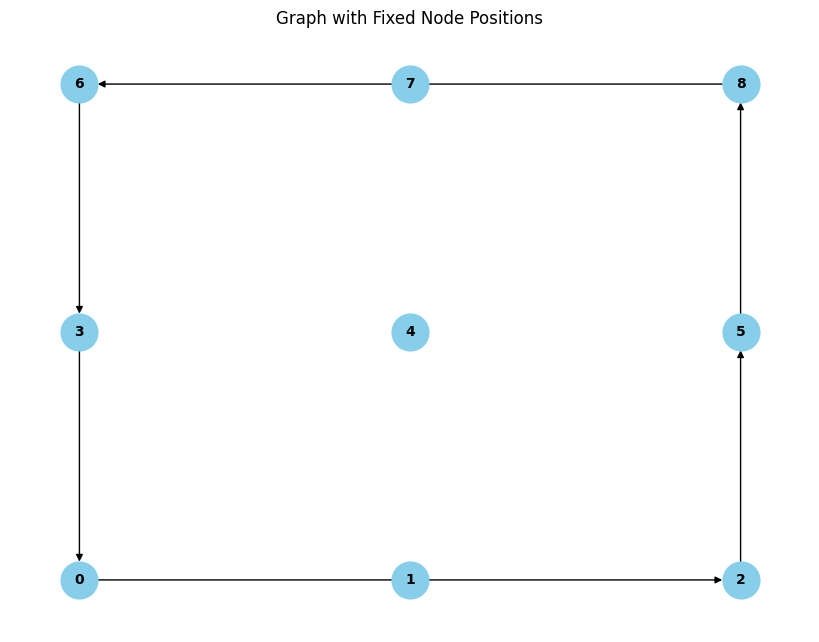

In [3]:
from uav_routing.data import generate_random_graph, plot_interactive_graph, plot_graph_with_positions

import networkx as nx
best_state = optimizer.best_state
T = best_state.tour


pos = {node: best_state.nodes[node]["position"] for node in best_state.nodes}
best_state.nodes.keys()
plot_graph_with_positions(pos, list(T.edges))

#plot_interactive_graph(pos, edges)

#nx.draw(cycle)

#pos = {node:(nodes[node].position,nodes[node].position)}
#nx.draw(T, pos=...) 

In [10]:
T.edges

OutEdgeView([(0, 6), (8, 2), (5, 0), (3, 8), (6, 3), (2, 5)])

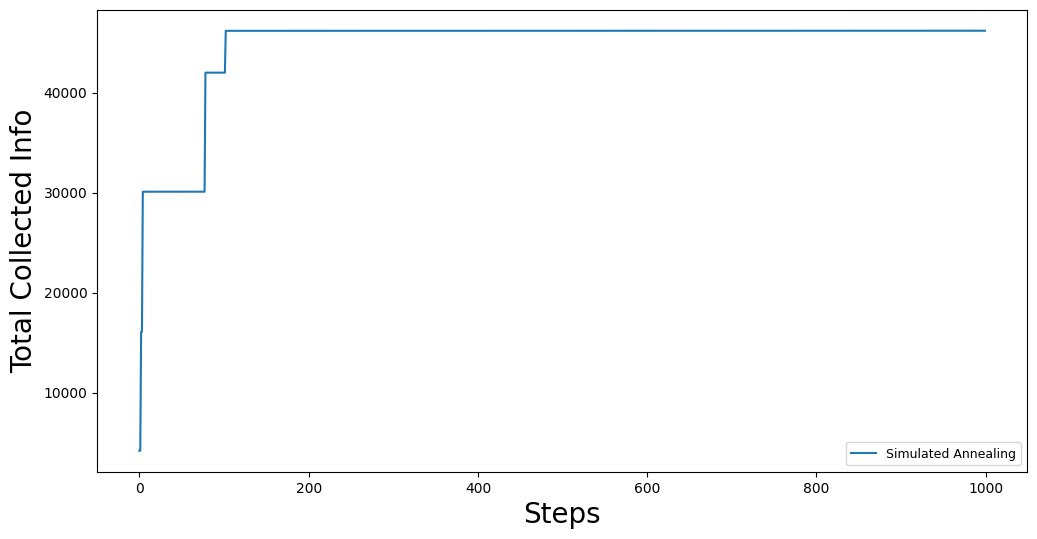

In [4]:
fig, ax = plt.subplots(figsize=(12,6))

plt.plot(max_scores_anneal, label="Simulated Annealing")

plt.xlabel("Steps", fontsize=20)
plt.ylabel("Total Collected Info", fontsize=20)
plt.legend(fontsize=9)
plt.show()

In [ ]:
from uav_routing.optimization import Optimizer
import matplotlib.pyplot as plt

total_steps = 1000

import numpy as np

#----- Short Bursts
max_scores_as = np.zeros(total_steps)
scores_as = np.zeros(total_steps)

for i, part in enumerate(optimizer.ascent_run(total_steps, with_progress_bar=True)):
    max_scores_as[i] = optimizer.best_score
    scores_as[i] = optimizer.score(part)


#----- Short Bursts
max_scores_sb = np.zeros(total_steps)
scores_sb = np.zeros(total_steps)

for i, part in enumerate(optimizer.short_bursts(num_bursts=5, burst_length=200, with_progress_bar=True)):
    max_scores_sb[i] = optimizer.best_score
    scores_sb[i] = optimizer.score(part)


#----- Simulated Annealing
max_scores_anneal = np.zeros(total_steps)
scores_anneal = np.zeros(total_steps)

for i, part in enumerate(
    optimizer.simulated_annealing(
        total_steps,
        optimizer.jumpcycle_beta_function(20, 80),
        beta_magnitude=1,
        with_progress_bar=True
    )
):
    max_scores_anneal[i] = optimizer.best_score
    scores_anneal[i] = optimizer.score(part)


# ----- Short Busts
max_scores_tilt = np.zeros(total_steps)
scores_tilt = np.zeros(total_steps)

for i, part in enumerate(optimizer.tilted_run(total_steps, p=0.125, with_progress_bar=True)):
    max_scores_tilt[i] = optimizer.best_score
    scores_tilt[i] = optimizer.score(part)


In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
plt.plot(max_scores_as, label="Ascent Run")
plt.plot(max_scores_sb, label="Short Bursts")
plt.plot(max_scores_anneal, label="Simulated Annealing")
plt.plot(max_scores_tilt, label="Tilted Run")

plt.xlabel("Steps", fontsize=20)
plt.ylabel("Max Information Collection Observered", fontsize=20)
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
plt.plot(scores_as, label="Ascent Run")
plt.plot(scores_sb, label="Short Bursts")
plt.plot(scores_anneal, label="Simulated Annealing")
plt.plot(scores_tilt, label="Tilted Run")
plt.xlabel("Steps", fontsize=20)
plt.ylabel("Total Collected Info", fontsize=20)
plt.legend(fontsize=9)
plt.show()

# Geometric Plot

In [ ]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(8,8))
ax.set_yticks([])
ax.set_xticks([])
ax.set_title("Initial Partition in MN")
initial_partition.plot(ax=ax, cmap='tab20c')

In [ ]:
"""%matplotlib inline
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('png')

import pandas as pd

import matplotlib.cm as mcm
import matplotlib.pyplot as plt
import networkx as nx
from PIL import Image
import io
import ipywidgets as widgets
from IPython.display import display, clear_output

frames = []
district_data = []

for i, partition in enumerate(recom_chain):
    for district_name in partition.perimeter.keys():
        population = partition.population[district_name]
        perimeter = partition.perimeter[district_name]
        area = partition.area[district_name]
        district_data.append((i, district_name, population, perimeter, area))

    buffer = io.BytesIO()
    fig, ax = plt.subplots(figsize=(10,10))
    partition.plot(ax=ax, cmap='tab20')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.savefig(buffer, format='png', bbox_inches='tight')
    buffer.seek(0)
    image = Image.open(buffer)
    frames.append(image)
    plt.close(fig)

df = pd.DataFrame(
    district_data,
    columns=[
        'step',
        'district_name',
        'population',
        'perimeter',"""
        'area'
    ]
)

def show_frame(idx):
    clear_output(wait=True)
    display(frames[idx])

slider = widgets.IntSlider(value=0, min=0, max=len(frames)-1, step=1, description='Frame:')
slider.layout.width = '500px'
widgets.interactive(show_frame, idx=slider)


In [24]:
import pandas as pd
file_path = "/Users/kirtisoglu/Documents/GitHub/UAV-Routing/datasets/50_c101.txt"


# Skip the first 2 lines and read the rest into a DataFrame
df = pd.read_csv(file_path)

print(df.head())
print("DataFrame shape:", df.shape)

                                   4 10 50 1
0                                      0 200
1         0 40.00 50.00 0.00 0.00 0 0 0 1236
2    1 45.00 68.00 90.00 10.00 1 1 1 912 967
3    2 45.00 70.00 90.00 30.00 1 1 1 825 870
4     3 42.00 66.00 90.00 10.00 1 1 1 65 146
DataFrame shape: (52, 1)
